# 🤖 Введение в машинное обучение и линейные модели 🤖

## 👨🏻‍💻 Упр. - Введение в машинное обучение
Выберите задачу из реальной жизни, которую можно решить с помощью машинного обучения.
 - Определите тип задачи (регрессия, классификация и т. д.) и опишите данные, которые вам понадобятся.

✔️**Решение:**

Пример задачи из реальной жизни, которую можно решить с помощью машинного обучения: определить стоимость недвижимости, исходя из её ключевых характеристик (количество комнат, этаж, ремонт, инфраструктура и т. д.).  

Тип задачи: регрессия.  

Описание данных, которые понадобятся: модель обучается на данных, содержащих информацию о проданных объектах, и прогнозирует цену.  

Ещё один пример: определить, является ли электронное письмо спамом или нет.  

Тип задачи: классификация.  

Описание данных, которые понадобятся: входными данными будут различные характеристики письма (например, наличие определённых слов), а целевая переменная — метка «спам» или «не спам».  

Также к задачам машинного обучения относятся, например, поиск мест залегания полезных ископаемых, где в роли признаков выступают сведения, добытые при помощи геологической разведки.

## 👨🏻‍💻Практика - Прогнозирование продаж
Предсказание объема продаж компании на основе данных о расходах на рекламу, количестве торговых точек и других факторах. Реализуйте линейную регрессию на языке Python , используя библиотеку scikit-learn.

✔️**Решение:**
### ✔ Импорт библиотек: 
Импортируем необходимые библиотеки: 
 - pandas для работы с данными, 
 - train_test_split для разделения данных, 
 - LinearRegression для создания модели, 
 - mean_squared_error и r2_score для оценки качества.
 - import matplotlib.pyplot as plt для визуализации результата модели

In [1]:
# установим библиотеку scikit-learn
# !pip install pandas scikit-learn

In [2]:
# импортируем все необходимые библиотеки для работы с данными
import pandas as pd
# для разделения данных
from sklearn.model_selection import train_test_split
# для создания модели
from sklearn.linear_model import LinearRegression
# для оценки качества
from sklearn.metrics import mean_squared_error, r2_score

# графики
import matplotlib.pyplot as plt

### ✔ Загрузка данных: 
Загружаем данные из CSV-файла (предполагается, что у вас есть файл data.csv). 
Важно: замените 'data.csv' на реальное имя вашего файла.

Описание данных:
 - `season`        : 1 - весна, 2 - лето, 3 - осень, 4 - зима
 - `yr`            : 0 - 2011, 1 - 2012
 - `mnth`          : от 1 до 12 (соответственно январь---декабрь)
 - `holiday`       : 0 - нет праздника, 1 - есть праздник
 - `weekday`       : от 0 до 6 (соответственно понедельник---воскресенье)
 - `workingday`    : 0 - нерабочий день, 1 - рабочий день
 - `weathersit`    : оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
 - `temp`          : температура по шкале Цельсия
 - `atemp`         : средняя температура по шкале Цельсия
 - `hum`           : влажность
 - `windspeed(mph)`: скорость ветра в милях в час
 - `windspeed(ms)` : скорость ветра в метрах в секунду
 - `cnt`           : количество арендованных велосипедов (это целевой признак, его мы будем предсказывать).


In [3]:
# Загружаем данные 
data = pd.read_csv(
    r'C:\Users\79181\n.brykovskaya\module_2\4ML\files\bikes_rent.csv')
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


### ✔ Определение признаков и целевой переменной: 
Указываем, какие столбцы в данных являются признаками (X) и какой столбец - целевой переменной (y).

Предположим, что 'cnt' - зависимая переменная (целевая) количество арендованных велосипедов , а остальные столбцы - независимые переменные (признаки)

In [4]:
# Определяем независимые переменные (признаки) и зависимую переменную (целевая)
X = data.drop('cnt', axis=1)
y = data['cnt']

### ✔ Разделение данных: 
Разделяем данные на обучающую и тестовую выборки в соотношении 70/30. 

random_state используется для воспроизводимости результатов.

In [5]:
# Разделяем данные на обучающую (70%) и тестовую (30%) выборки
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size=0.3, random_state=0)
                                    )

### ✔Создание и обучение модели:
Создаем экземпляр класса LinearRegression и обучаем его на обучающих данных с помощью метода fit().

In [6]:
# Создаем модель линейной регрессии
model = LinearRegression()
# Обучаем модель на обучающих данных
model.fit(X_train, y_train)

LinearRegression()

### ✔Предсказания:
Делаем предсказания на тестовых данных с помощью метода predict().

In [7]:
# Делаем предсказания на тестовых данных
y_pred = model.predict(X_test)

### ✔Оценка качества: 
Вычисляем MSE, RMSE и R-квадрат, сравнивая предсказанные значения (ypred) с фактическими (ytest).

In [8]:
# Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

### ✔ Вывод результатов: 
Выводим значения метрик и коэффициентов модели.

In [9]:
# Выводим результаты
print(f"✔️MSE:👉  {mse}")
print(f"✔️RMSE:👉  {rmse}")
print(f"✔️R-квадрат:👉  {r2}")

# Дополнительная информация: выводим коэффициенты модели
print(f"✔️Коэффициенты:👉 {model.coef_}")
print(f"✔️Свободный член:👉 {model.intercept_}")

✔️MSE:👉  784575.6143137122
✔️RMSE:👉  885.7627302577774
✔️R-квадрат:👉  0.8098971252415497
✔️Коэффициенты:👉 [ 4.95425816e+02  1.94912062e+03 -3.94014254e+01 -3.99806299e+02
  5.86195869e+01  5.25486214e+01 -4.78151233e+02  6.62863182e+01
  5.74229594e+01 -1.17988236e+01  3.83621621e+12 -8.58161566e+12]
✔️Свободный член:👉 1617.4471471379647


### ✔ Визуализация:
чтобы посмотреть, насколько хорошо модель описывает данные

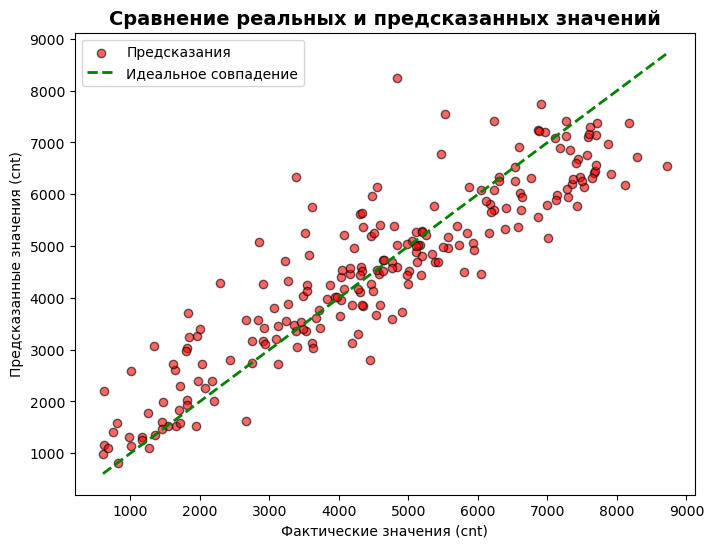

In [10]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, 
            y_pred, 
            color='red', 
            alpha = 0.6, 
            edgecolors='black',
            label='Предсказания')

plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()],
         color = 'g', 
         linestyle = '--',  
         linewidth=2,
         label='Идеальное совпадение')

plt.xlabel('Фактические значения (cnt)')
plt.ylabel('Предсказанные значения (cnt)')
plt.title('Сравнение реальных и предсказанных значений',
         fontsize=14, fontweight='bold')
plt.legend()
plt.show()